Simple but informative -- that's the goal of this dataset.


This kernel will demonstrate the following:

-Loading the data

-Google maps

-Pivot table

-Simple graphs

-Percent change

-Seaborn heatmap


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import sklearn as skl
import seaborn as sns
sns.set()
import os

In [2]:
#to get all the files in the current working directory
os.listdir()

['  Emergency - 911 Calls Montgomery County, PA.ipynb',
 '.ipynb_checkpoints',
 '911.csv',
 'Portfolio- 911 Analysis.ipynb']

In [3]:
df = pd.read_csv("911.csv")

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.describe(include ="all")

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
count,289240.000000,289240.000000,289240,253942.000000,289240,289240,289137,289240,289240.0
unique,NaN,NaN,289179,NaN,131,279595,68,32005,NaN
top,NaN,NaN,GREEN ST & E BASIN ST; NORRISTOWN; Station 30...,NaN,Traffic: VEHICLE ACCIDENT -,2016-06-01 16:34:27,LOWER MERION,SHANNONDELL DR & SHANNONDELL BLVD,NaN
freq,NaN,NaN,4,NaN,68123,6,24826,2907,NaN
mean,40.159149,-75.316496,NaN,19235.103413,NaN,NaN,NaN,NaN,1.0
std,0.088823,0.160315,NaN,304.051163,NaN,NaN,NaN,NaN,0.0
min,30.333596,-95.595595,NaN,17555.000000,NaN,NaN,NaN,NaN,1.0
25%,40.099904,-75.392320,NaN,19038.000000,NaN,NaN,NaN,NaN,1.0
50%,40.144223,-75.304587,NaN,19401.000000,NaN,NaN,NaN,NaN,1.0
75%,40.229008,-75.211038,NaN,19446.000000,NaN,NaN,NaN,NaN,1.0


In [6]:
df.shape

(289240, 9)

In [7]:
#getting the info the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [8]:
df.count()

lat          289240
lng          289240
desc         289240
zip          253942
title        289240
timeStamp    289240
twp          289137
addr         289240
e            289240
dtype: int64

In [9]:
#converting timstamp from object to timestamp
df['timeStamp'] = pd.to_datetime(df.timeStamp)

In [10]:
# to see how many valuse are missing in  columns

In [11]:
x = df.count() - 289240

In [12]:
x

lat              0
lng              0
desc             0
zip         -35298
title            0
timeStamp        0
twp           -103
addr             0
e                0
dtype: int64

# dealing with missing values

In [13]:
# inplace modifies the original data and thresh gives the requried amount of data
#mean if more than 10% of data miising in bellow code then it will drop that columns
print(df.columns)
df1 = df.dropna(axis=1,thresh =(289240*0.90),inplace = True)



Index(['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')


In [14]:
print(df.columns)

Index(['lat', 'lng', 'desc', 'title', 'timeStamp', 'twp', 'addr', 'e'], dtype='object')


In [15]:
# dropping column e as e has  all value same

In [16]:
df.drop(["e"],axis = 1,inplace = True )

In [17]:
df.head(2)

,lat,lng,desc,title,timeStamp,twp,addr
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 7 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
title        289240 non-null object
timeStamp    289240 non-null datetime64[ns]
twp          289137 non-null object
addr         289240 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 15.4+ MB


In [19]:
df.shape

(289240, 7)

In [20]:
df.count()-289240

lat            0
lng            0
desc           0
title          0
timeStamp      0
twp         -103
addr           0
dtype: int64

In [21]:
# droping the row containg missing values

In [22]:
df.isna().any()

lat          False
lng          False
desc         False
title        False
timeStamp    False
twp           True
addr         False
dtype: bool

In [23]:
df.dropna(axis=0, inplace = True)

In [24]:
df.isna().any()

lat          False
lng          False
desc         False
title        False
timeStamp    False
twp          False
addr         False
dtype: bool

In [25]:
df.shape

(289137, 7)

In [26]:
#seperating the title column and to become more specific

In [27]:
df['specific_Reason'] = df['title'].apply(lambda title: title.split(":")[1])

In [28]:
df["title"] = df["title"].apply(lambda title: title.split(":")[0])

In [29]:
df.head()

,lat,lng,desc,title,timeStamp,twp,addr,specific_Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,EMS,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,Fire,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,EMS,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,EMS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,DIZZINESS


In [30]:
df.shape

(289137, 8)

In [31]:
#seperating the month, day of week, and hour from the Timestamp column to beacome more specific

In [32]:
df["hr"] =df['timeStamp'].apply(lambda Timestamp: Timestamp.hour)

In [33]:
df["month"] = df["timeStamp"].apply(lambda  Timestamp: Timestamp.month)

In [34]:
df['dayofweek'] = df['timeStamp'].apply(lambda  Timestamp: Timestamp.dayofweek )

In [35]:
df.head(2)

,lat,lng,desc,title,timeStamp,twp,addr,specific_Reason,hr,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,EMS,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,BACK PAINS/INJURY,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,EMS,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,DIABETIC EMERGENCY,17,12,3


In [36]:
df.shape

(289137, 11)

In [37]:
# dropping column timeStamp 
df.drop(['timeStamp'],axis=1, inplace= True)

In [38]:
df.columns

Index(['lat', 'lng', 'desc', 'title', 'twp', 'addr', 'specific_Reason', 'hr',
       'month', 'dayofweek'],
      dtype='object')

# Analysis

In [43]:
x =df['title'].value_counts()

AxesSubplot(0.125,0.125;0.775x0.755)


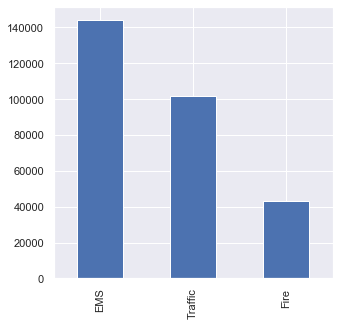

In [53]:
plt.figure(figsize =(5,5))
print(x.plot(kind ="bar"))




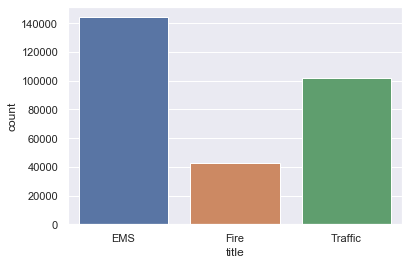

In [64]:
sns.countplot(df['title'])

from graph we can see the cases of EMS was more as compared to fire and traffic

In [96]:
#this is the top 10 specific cases
x = df['specific_Reason'].value_counts().head(30)
print(x)

 VEHICLE ACCIDENT -             68122
 DISABLED VEHICLE -             20666
 VEHICLE ACCIDENT               16720
 FIRE ALARM                     16357
 RESPIRATORY EMERGENCY          14632
 FALL VICTIM                    14580
 CARDIAC EMERGENCY              14488
 ROAD OBSTRUCTION -              8767
 SUBJECT IN PAIN                 8148
 HEAD INJURY                     7611
 UNKNOWN MEDICAL EMERGENCY       5160
 SYNCOPAL EPISODE                4998
 SEIZURES                        4808
 GENERAL WEAKNESS                4619
 ALTERED MENTAL STATUS           4206
 ABDOMINAL PAINS                 4142
 MEDICAL ALERT ALARM             4042
 FIRE INVESTIGATION              3990
 HEMORRHAGING                    3692
 OVERDOSE                        3665
 UNCONSCIOUS SUBJECT             3663
 CVA/STROKE                      3627
 NAUSEA/VOMITING                 3406
 GAS-ODOR/LEAK                   3129
 BUILDING FIRE                   2770
 CARDIAC ARREST                  2560
 DIABETIC EM

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]), <a list of 89 Text xticklabel objects>)

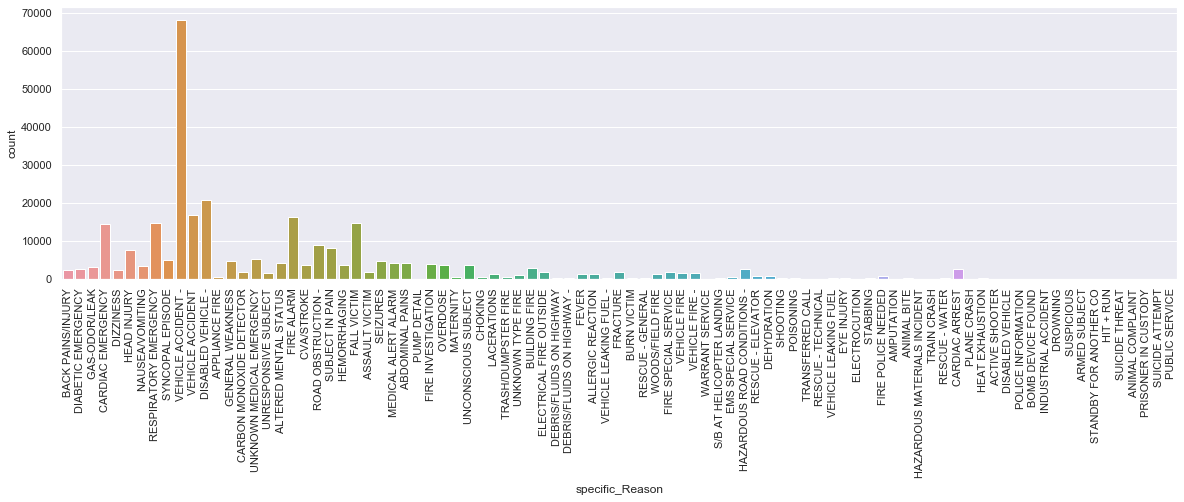

In [99]:
plt.figure(figsize=(20,5))
sns.countplot(df['specific_Reason'],)
plt.xticks(rotation=90)

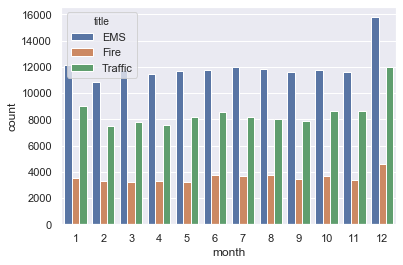

In [106]:
# now checking in all months when all accident took place
sns.countplot(x='month',data = df ,hue=df.title)